**Part 7**

In [102]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from scipy.linalg import norm

In [103]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df1=pd.read_csv('sample_data/california_housing_test.csv')

In [146]:
y = df['median_income'].values
X=df.drop(['median_income'],axis =1).values

In [147]:

A=X[:500]
y=y[:500]

mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
m = y.mean()
y = y-m
n,p=A.shape

In [152]:
C = A.transpose().dot(A)


2 / ( np.linalg.norm(C,2) + np.linalg.norm(C,-2) )

0.00102150659527235

In [153]:
class RegPb(object):
    '''                                                                   
        A class for regression problems with linear models.
        
        Attributes:
            A: Data matrix (features)
            y: Data vector (labels)
            n,d: Dimensions of A
            loss: Loss function to be considered in the regression
                'l2': Least-squares loss
                'logit': Logistic loss
            lbda: Regularization parameter
    '''
   
    # Instantiate the class
    def __init__(self, A, y,lbda=0):
        self.A = A
        self.y = y
        self.n, self.p = A.shape
       
        self.lbda = lbda
        
    
    # Objective value
    def f(self, x):
      return np.linalg.norm(self.A.dot(x) - self.y) ** 2 / (2. ) + self.lbda * norm(x) ** 2 / 2.
       
    # Partial objective value
    def f_i(self, i, x):
       
      return np.linalg.norm(self.A[i].dot(x) - self.y[i]) ** 2 / (2.) + self.lbda * norm(x) ** 2 / 2.
 
    
    # Full gradient computation
    def grad(self, x):
        
    
        return self.A.T.dot(self.A.dot(x) - self.y)  + self.lbda * x
       
    
    # Partial gradient
    def grad_i(self,i,x):
        a_i = self.A[i]
        
        
        return (a_i.dot(x) - self.y[i]) * a_i + self.lbda*x
      
    def fl1(self,x):
        return self.f(x)+norm(x,ord=1)

    # maximum learning rate  for the gradient
    def tau(self):
        C = A.transpose().dot(A)
        L = norm(C+self.lbda*np.eye(self.p), ord=2) ** 2  
       
        return 1/L
    # optimal learning rate
    def tau_opt(self):
      C = A.transpose().dot(A)
     

      tau_opt = 2 / ( np.linalg.norm(C,2) + np.linalg.norm(C,-2) )
      return tau_opt

In [125]:
def gradientdescent(prob,x0,iter,tau): ## 
  
  s=x0
  L=[]
  val=0
  for i in range(iter):
    
    
    g=prob.grad(s)
    
    s=s - tau*g
   
    val=prob.f(s)
    L.append(val)
  return np.array(L),s

In [136]:

def heavyball(prob,x0,x_min,n_epochs,tau_opt,gamma):
  m0=prob.grad(x0)
  s=x0
  L1=[]
  for i in range(n_epochs):
    
    h=gamma*m0+(1-gamma)*prob.grad(s)
    m0=h
    
    s=s-tau_opt*m0
    
    L1.append(prob.f(s)-prob.f(x_min))

  return np.array(L1),s

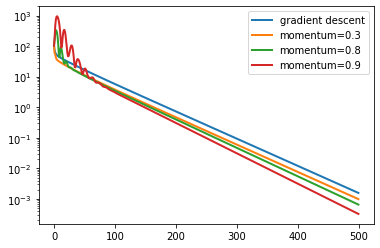

In [190]:
x0=np.zeros(p)
prob=RegPb(A,y)
n_epochs=500
tau_opt=prob.tau_opt()

x_min = np.linalg.solve( A.transpose().dot(A), A.transpose().dot(y) )

L5=gradientdescent(prob,x0,n_epochs,tau_opt)[0]
L6=heavyball(prob,x0,x_min,n_epochs,tau_opt,0.3)[0]
L7=heavyball(prob,x0,x_min,n_epochs,tau_opt,0.8)[0]
L8=heavyball(prob,x0,x_min,n_epochs,tau_opt,0.9)[0]

plt.semilogy([i for i in range(n_epochs)],L5-prob.f(x_min), label="gradient descent", lw=2)
plt.semilogy([i for i in range(n_epochs)],L6, label="momentum=0.3", lw=2)
plt.semilogy([i for i in range(n_epochs)],L7, label="momentum=0.8", lw=2)
plt.semilogy([i for i in range(n_epochs)],L8, label="momentum=0.9", lw=2)
plt.legend()
plt.show()